In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !mv drive/MyDrive/py_files/ /content

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import py_files
from py_files import load_data, const, bird_info
import warnings
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import  math
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

2022-02-07 15:09:55.565700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-07 15:09:55.565727: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
# f_drive = "drive/MyDrive/"
f_drive=""

In [5]:
# !unzip drive/MyDrive/img.zip

In [6]:
image_size = (256, 256)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f_drive+"birds/",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f_drive+"birds/",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 3000 files belonging to 11 classes.
Using 2400 files for training.
Found 3000 files belonging to 11 classes.
Using 600 files for validation.


2022-02-07 15:09:57.297897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/michael/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-02-07 15:09:57.297919: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-07 15:09:57.297938: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mike-lenovo-laptop-2): /proc/driver/nvidia/version does not exist
2022-02-07 15:09:57.298163: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f_drive+"val_ten_uk_birds/",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 100 files belonging to 10 classes.


In [8]:
print(test_ds.class_names)

['0_common_blackbird', '1_house_sparrow', '2_great_tit', '3_wood_pigeon', '4_european_robin', '5_eurasian_magpie', '6_eurasian_blue_tit', '7_common_starling', '8_european_goldfinch', '9_long_tailed_tit']


In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

2022-02-07 15:09:57.443370: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(32, 256, 256, 3)
(32,)


In [10]:
normalization_layer = keras.layers.Rescaling(1./255)

In [11]:
normalised_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalised_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
# x=list(test_ds.as_numpy_iterator())

In [13]:
# for image in x:
#   for i in image:
#     for index in np.arange(10):
#       plt.imshow(i[index])
    


In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [15]:
# images, labels = load_data.load_data_from_folder(f_drive+"filtered_birds/")

In [16]:
# test_images, test_labels = load_data.load_data_from_folder(f_drive+"val_ten_uk_birds/")

In [17]:
# test_labels=list(np.transpose(np.arange(0,10)*np.ones((10,10))).flatten())


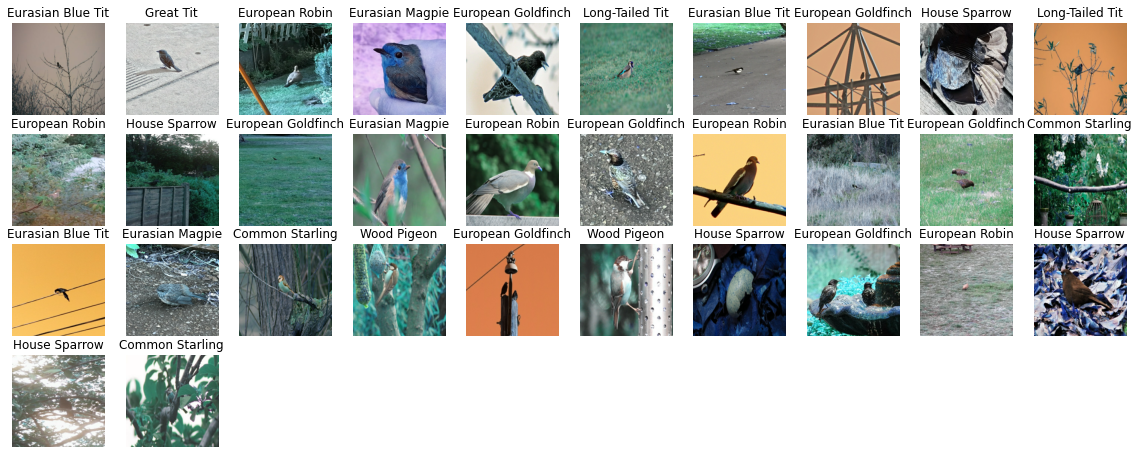

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, L_labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(10, 10, i + 1)
        img = images[i].numpy().astype("uint8")
        image_rgb=cv2.cvtColor(images[i].numpy().astype("uint8"), cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title(const.COMMON_NAMES[int(L_labels[i])])
        plt.axis("off")

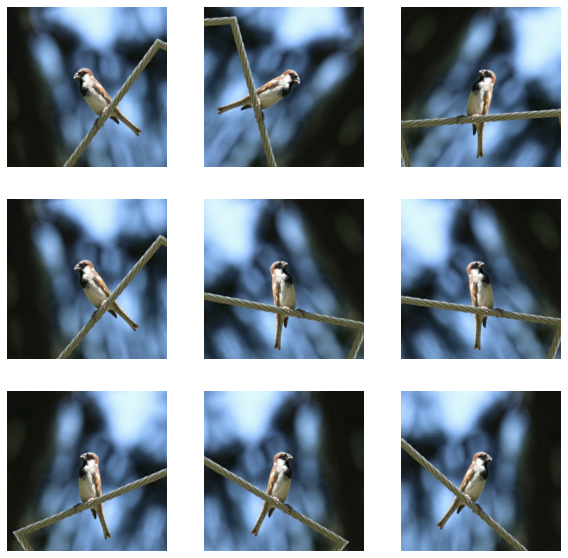

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
# images_rgb =[]
# for image in images:
  
#   img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   images_rgb.append(img_rgb)

In [22]:
# test_images_brg =[]
# for image in test_images:
  
#   img_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#   test_images_brg.append(img_rgb)

In [23]:
# pd_data=pd.DataFrame(columns=['Images', 'Labels', 'Image_Quality'])
# pd_data['Images']=images
# pd_data['Labels']=labels_np
# # pd_data['Image_Quality']=image_quality_np

In [24]:
# pd_data.head()

In [25]:
# labels_value, labels_counts = np.unique(labels_np, return_counts=True)
# # image_quality_values, image_quality_counts = np.unique(image_quality_np, return_counts=True)

In [26]:
# ia = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
# plt.imshow(ia)

In [27]:
# bird_info.visualise_10_10_images(images_rgb, labels, labels_value)

In [28]:
# bird_info.visualise_10_10_images(test_images, test_labels, labels_value)

Models

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense, Dropout, Rescaling

def simple_model(shape):
    model = keras.Sequential()
    
    model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=1, padding="valid", activation='relu', input_shape=shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units=320, activation='relu'))
    model.add(Dense(units=140, activation='relu'))
    model.add(Dense(units=60, activation='relu'))
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model


In [30]:
def deeper_model(shape):
    
    model = keras.Sequential()
    
    model.add(layers.RandomFlip("horizontal"))
    model.add(layers.RandomRotation(0.1))
    
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, kernel_regularizer=tf.keras.regularizers.l2(0.0005),padding="valid", activation='relu', input_shape=shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, kernel_regularizer=tf.keras.regularizers.l2(0.0005), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=56, kernel_size=(3, 3), strides=1, padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=86, kernel_size=(3, 3), strides=1, padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units=320, activation='relu'))
    model.add(Dense(units=140, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=60, activation='relu'))

    model.add(Dense(units=10, activation = 'softmax'))
    return model

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model=ResNet50(weights='imagenet', include_top = False)

base_model.trainable=False
inputs = keras.Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.

x = base_model(inputs, training=False)


# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.Sequential(
    [
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dense(622, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(124, activation="relu"),
        keras.layers.Dense(62, activation="relu"),
        keras.layers.Dense(len(train_ds.class_names), activation="softmax"),
    ]
)(x)
model = keras.Model(inputs, outputs)

94781440/94765736 [==============================] - 6s 0us/step


In [32]:
# from tensorflow.keras.applications.resnet50 import ResNet50

# m=ResNet50(weights='imagenet')

In [33]:
m=model#m = deeper_model((256,256,3))

In [34]:
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 11)                2935525   
Total params: 26,523,237
Trainable params: 2,935,525
Non-trainable params: 23,587,712
_________________________________________________________________


In [35]:
m.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [36]:
# x1w = m.layers[5].get_weights()[0][:,:,0]

In [37]:
# plt.subplots(figsize=(12,12))
# for i in range(1,16):
#     plt.subplot(3,5,i)
#     plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
# plt.show()

In [38]:
# X_train, X_test, Y_train, Y_test=train_test_split(images_rgb, labels,test_size=0.2, random_state=133)

In [39]:
# X_train=np.array(X_train).astype('float32')
# Y_train=np.array(Y_train).astype('float32')
# X_test=np.array(X_test).astype('float32')
# Y_test=np.array(Y_test).astype('float32')

In [40]:
# Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
# Y_test = keras.utils.to_categorical(Y_test, num_classes=10)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelCheckpoint=ModelCheckpoint('alex_net1', save_weights_only=True, save_best_only=True)

In [42]:
# Y_train.shape

In [43]:
len(val_ds.class_names)

11

In [ ]:
history=m.fit(train_ds, validation_data=val_ds, epochs=2, verbose=1)

2022-02-07 15:10:45.918105: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2022-02-07 15:10:46.013648: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2022-02-07 15:10:46.071227: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 138444800 exceeds 10% of free system memory.
2022-02-07 15:10:46.132123: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2022-02-07 15:10:46.185842: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.


 8/75 [==>...........................] - ETA: 2:37 - loss: 2.7580 - accuracy: 0.0859

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:
# X_val = np.array(test_images)
# Y_val = keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
# Y_val.shape


In [ ]:
# val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

In [ ]:
test_images = []
test_labels = []
for images, labels in val_ds.as_numpy_iterator():
  test_images.append(images)
  test_labels.append(labels)

In [ ]:

t_i=[]
for l in test_images:
  for n in l:
    t_i.append(n)


t_l=[]
for l in test_labels:
  for n in l:
    t_l.append(n)


In [ ]:
t_i = np.array(t_i)
t_l = np.array(t_l)

In [ ]:
t_i.shape

In [ ]:
m.evaluate(test_ds)

In [ ]:
preds = m.predict(t_i)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     f_drive+"val_ten_uk_birds/",
#     labels="inferred",
#     label_mode="int",
#     color_mode="rgb",
#     validation_split=0.2,
#     subset="training",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size
# )`

In [ ]:

# con_mat = tf.math.confusion_matrix(labels=t_l, predictions=preds).numpy()

In [ ]:
preds[1]

In [ ]:
(t_i[0].shape)

In [ ]:
# test_labels=[]


# for i in val_ds.as_numpy_iterator():
#   test_labels.append(i[1])



In [ ]:
# test_labels

In [ ]:

# t_l=[]
# for l in test_labels:
#   for n in l:
#     t_l.append(n)


In [ ]:
preds[1]

In [ ]:
np.where(np.max(preds[3]) == preds[3])

In [ ]:
t_l[3]

In [ ]:
max_val_per_row=np.amax(preds, axis=1)
len(max_val_per_row)

In [ ]:
max_where=[]
for index, max_row in enumerate(max_val_per_row):
  a = np.where(preds[index]==max_row)
  max_where.append(int(a[0]))

In [ ]:
print(max_where)
print(t_l)

In [ ]:

lab=np.ones((10,10))*np.arange(0,10)

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
results = confusion_matrix(t_l, max_where)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(results, annot=True, fmt='d')


In [ ]:
(18+8+28+22+31+20+14+9+12+14)/234

In [ ]:
plt.figure(figsize=(30, 30))
for , image_l in enumerate(t_l):
  ax = plt.subplot(10, 10, index + 1)
  plt.imshow(X_val[index])
  plt.title(str(max_where[index]) +  "===" + str(data_test[index,1]))
  plt.axis('off')